In [1]:
# import dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#importing our cancer dataset into a Pandas DataFrame
breast_cancer_data = pd.read_csv("Resources/cancer_data.csv")
                      

# Review the DataFrame
breast_cancer_data                      

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
# Remove leading/trailing whitespaces from column names and convert to lowercase
breast_cancer_data.columns = breast_cancer_data.columns.str.strip().str.lower()

# Drop the 'id' and 'unnamed: 32' columns as they are not needed for modeling
cancer_data_df = breast_cancer_data.drop(['id', 'unnamed: 32'], axis=1)

# Print the data types of each column
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Check for missing values in the dataset
missing_values = breast_cancer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [4]:
# Encoding the diagnosis column using a custom function
def encode_diagnosis(diagnosis):
    """
    This function encodes diagnosis by setting M as 1 and B as 0.
    """
    if diagnosis == "B":
        return 0
    else:
        return 1

# Call the encode_diagnosis function on the diagnosis column
breast_cancer_data["diagnosis"] = breast_cancer_data["diagnosis"].apply(encode_diagnosis)

# Review the DataFrame
breast_cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
breast_cancer_data.diagnosis.unique()

array([1, 0], dtype=int64)

In [7]:
diag_gr = breast_cancer_data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


<Axes: xlabel='diagnosis', ylabel='count'>

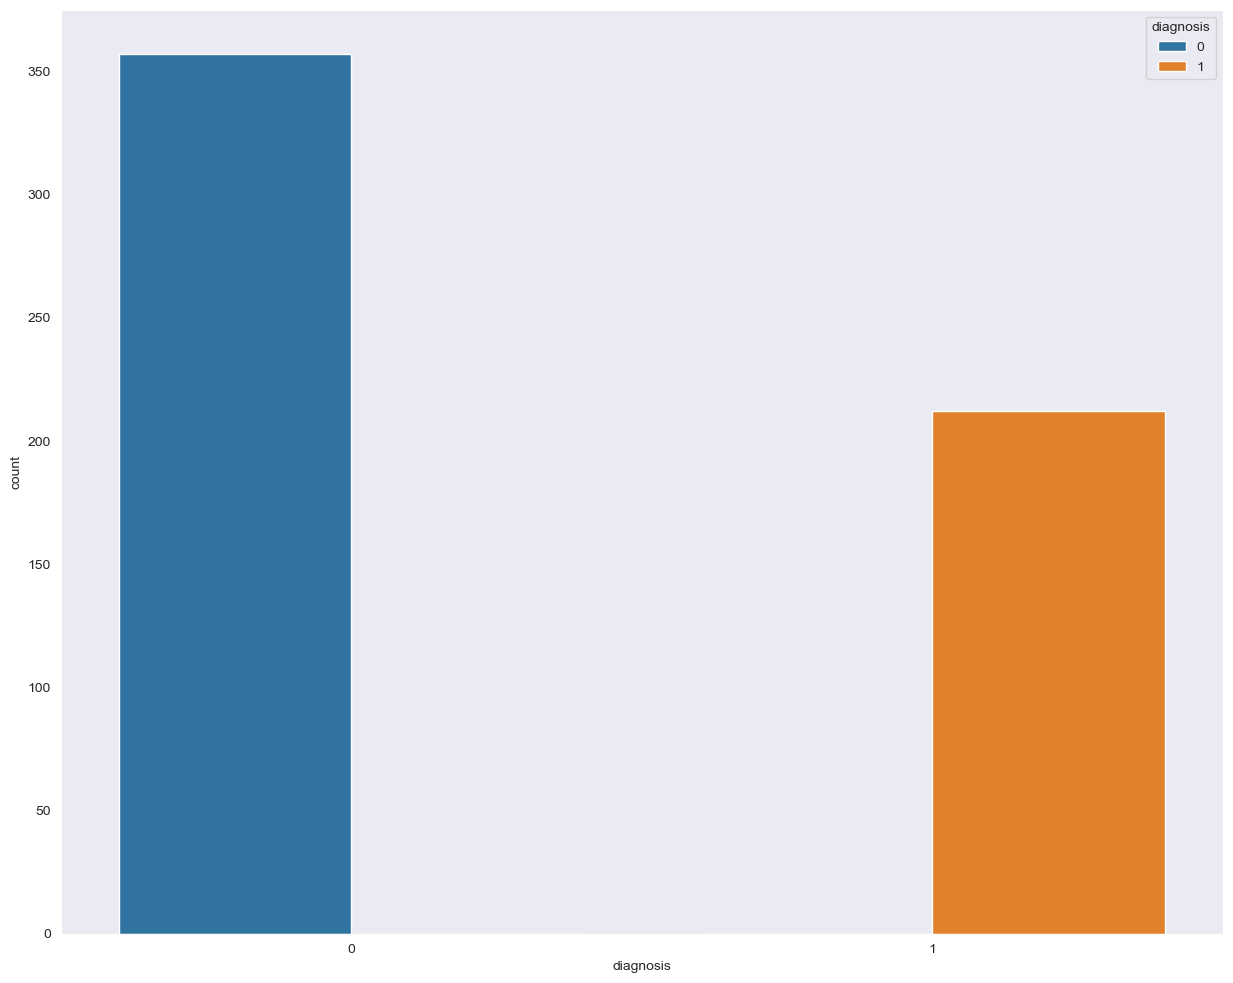

In [8]:
#lets get the frequency of cancer diagnosis
sns.set_style("dark")
sns.set_context({"figure.figsize": (15, 12)})
sns.countplot(x='diagnosis', hue='diagnosis', data=breast_cancer_data)

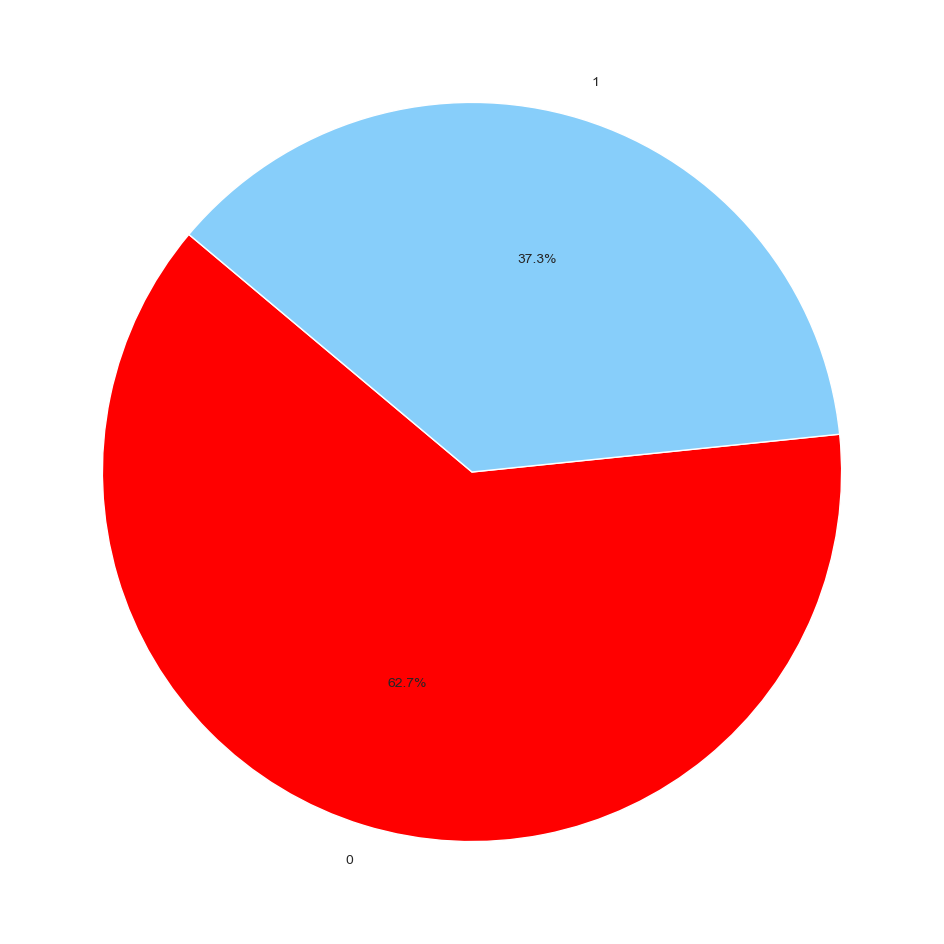

In [9]:
# Labels for the sections of our pie chart
labels = ["0", "1"]

# The values of each section of the pie chart
sizes = [357, 212]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Create the pie chart based upon the values above
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.show()

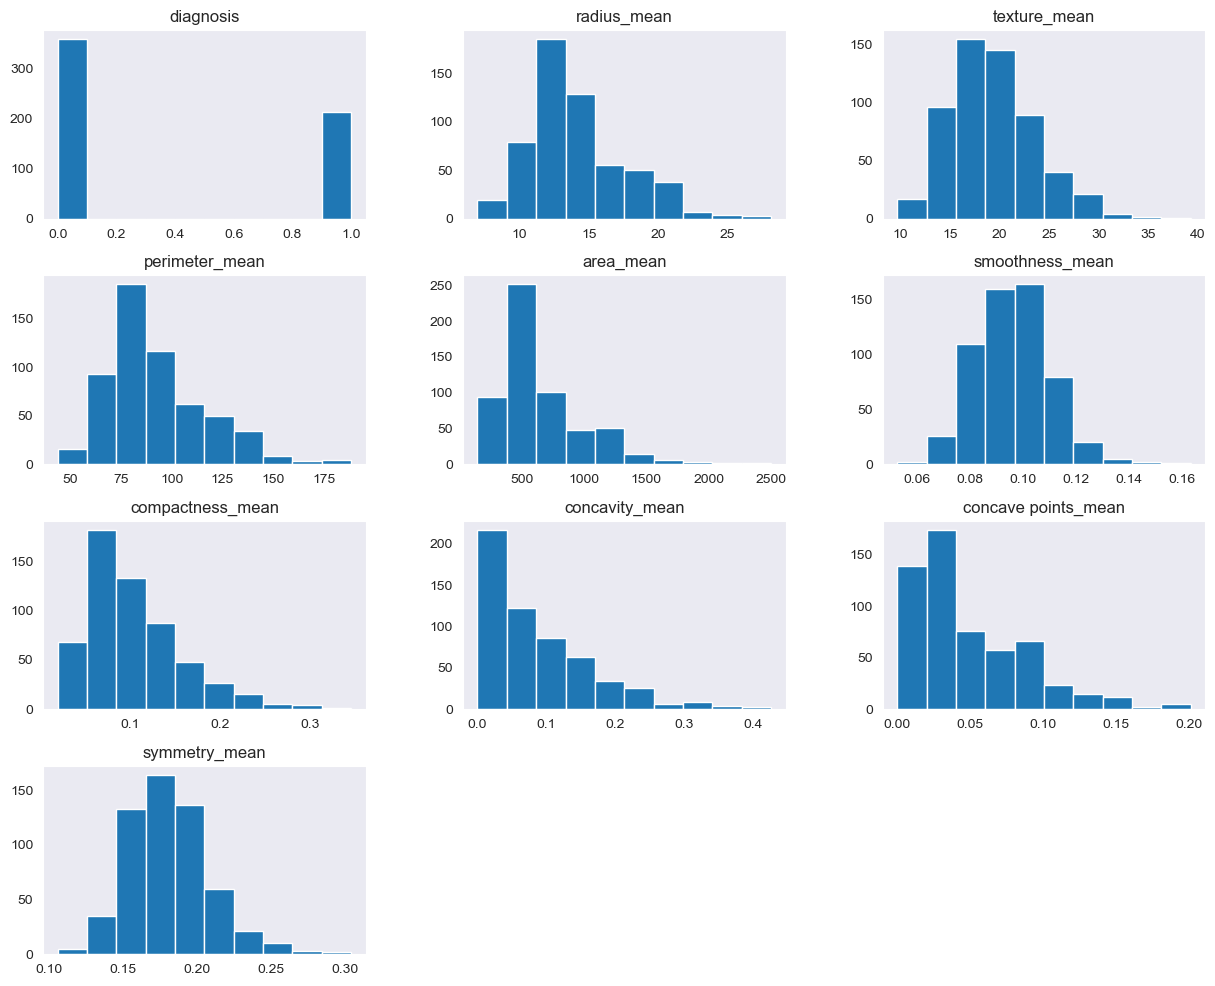

In [10]:
# To create a new DataFrame called data mean by slicing the original DataFrame breast_cancer_data
data_mean=breast_cancer_data.iloc[:,1:11]

# To generate a set of histograms using the hist() function in Pandas.
hist_mean=data_mean.hist(bins=10, figsize=(15, 12),grid=False,)

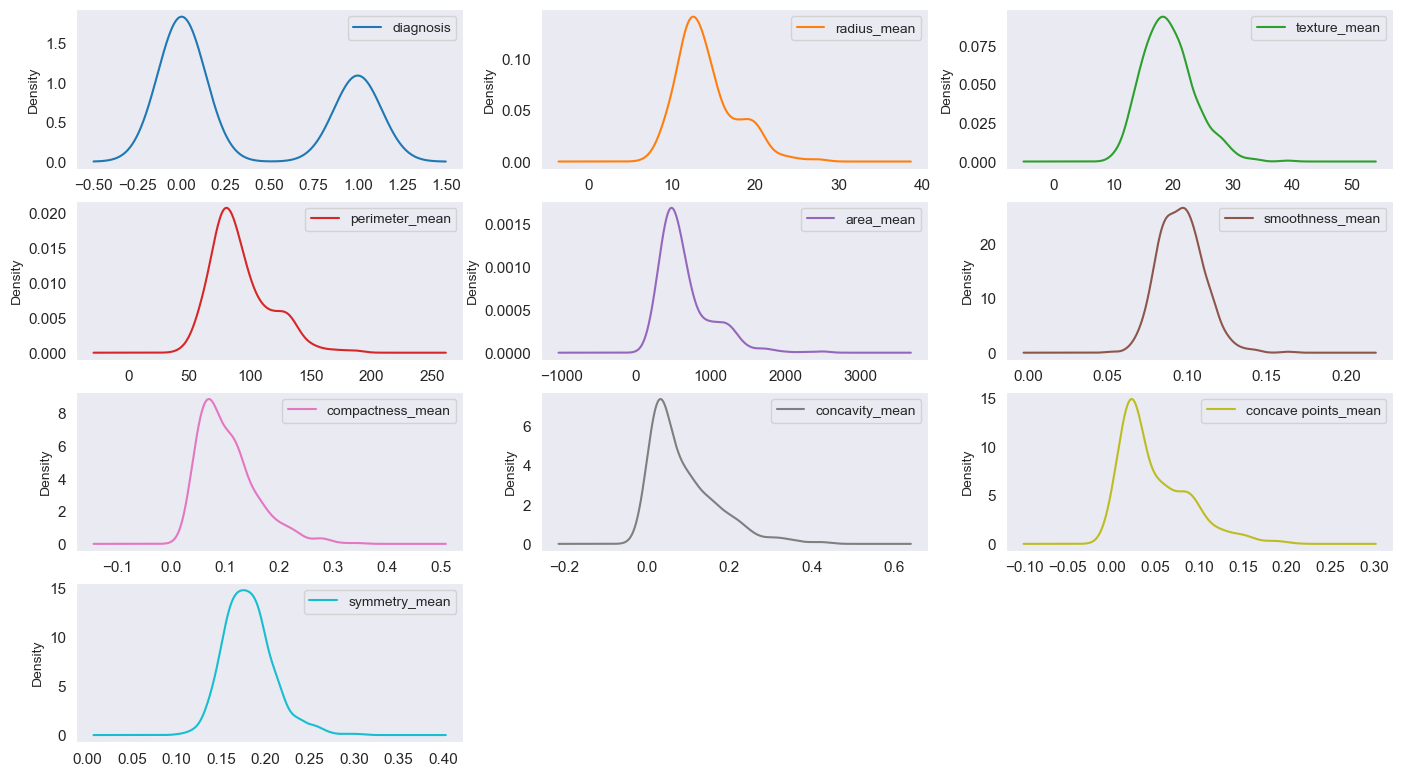

In [11]:
# To create a set of density plots using Matplotlib and generate a single figure with subplots.
plt = data_mean.plot(kind= 'density', subplots=True, layout=(5,3), sharex=False, 
                     sharey=False,fontsize=11, figsize=(17,12))

HISTOGRAM OBSERVATION:

Upon inspecting the distribution of the breast cancer dataset attributes, we notice that certain attributes like perimeter, radius, area, concavity, and compactness appear to have an exponential distribution, which is characterized by a skewed, non-symmetrical shape. On the other hand, attributes such as texture, smoothness, and symmetry exhibit a Gaussian or nearly Gaussian distribution, which is symmetrical and bell-shaped. 

This observation is noteworthy since several machine learning algorithms assume that the input variables follow a Gaussian distribution, and taking these properties into account can help optimize the performance of such models on this dataset.

In [12]:
# Separate the target variable (diagnosis) from the features
y = breast_cancer_data['diagnosis']
X = breast_cancer_data.drop('diagnosis', axis=1)

# Preview the features data
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Set x axis using average of breast cancer 
average_cancer_data_df = breast_cancer_data.mean()

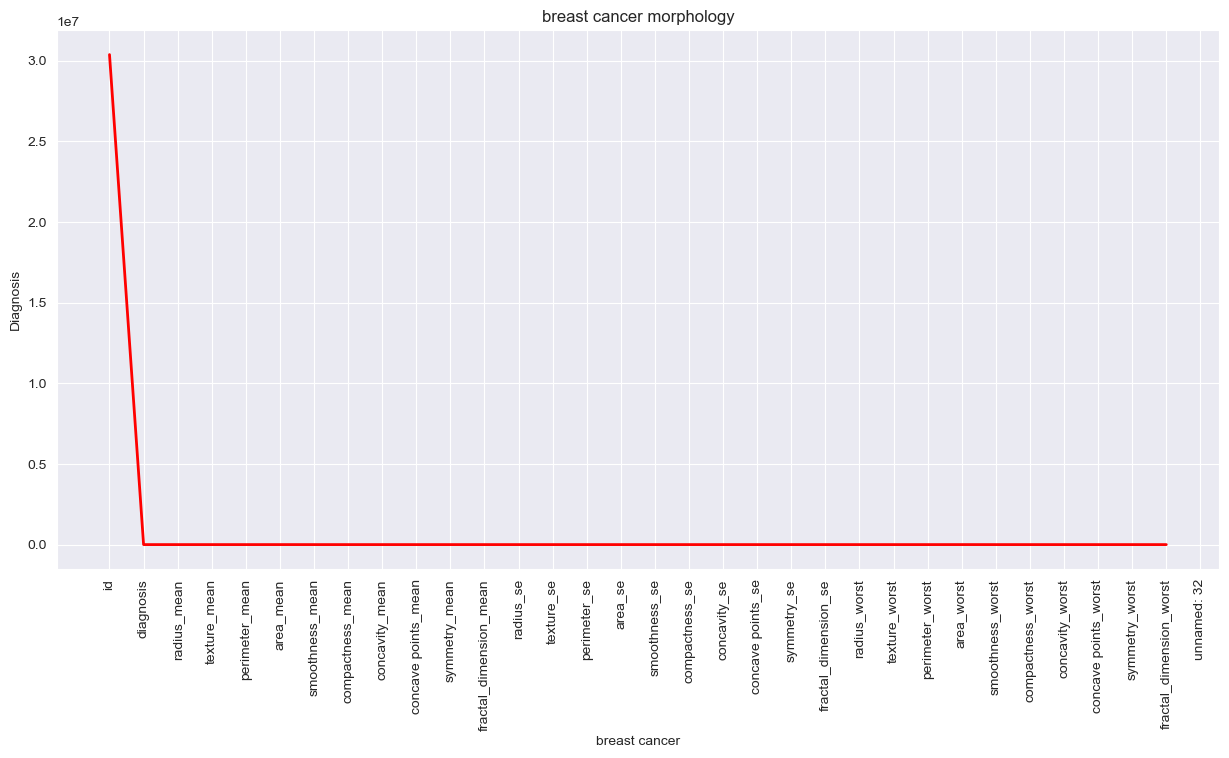

In [14]:
# create a line graph to show the trend in breast cancer across diagnosis
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(average_cancer_data_df, color="red",linewidth=2, markersize=12)
plt.title("breast cancer morphology")
plt.xlabel('breast cancer')
plt.ylabel('Diagnosis')
plt.xticks(rotation="vertical")
plt.grid(True)

plt.show()


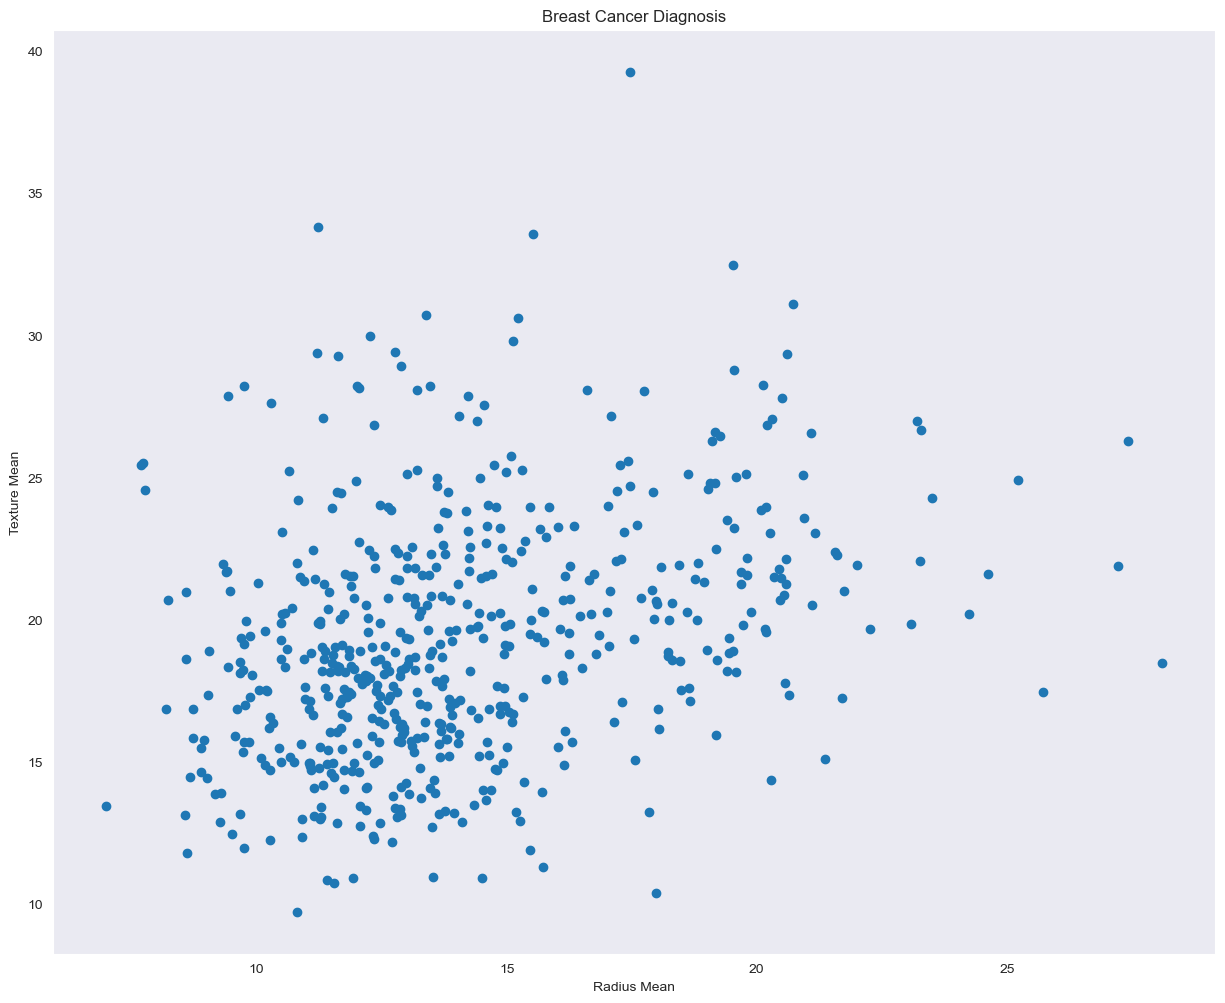

In [15]:
# Extract 'Radius Mean' and 'Texture Mean' columns
radius_mean = breast_cancer_data['radius_mean']
texture_mean = breast_cancer_data['texture_mean']

# Create scatter plot
plt.scatter(radius_mean, texture_mean)

# Set axis labels and plot title
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer Diagnosis')

# Display plot
plt.show()

In [16]:
print(breast_cancer_data[['diagnosis', 'radius_mean', 'texture_mean']].head())

   diagnosis  radius_mean  texture_mean
0          1        17.99         10.38
1          1        20.57         17.77
2          1        19.69         21.25
3          1        11.42         20.38
4          1        20.29         14.34


In [17]:
# converts the values in the 'diagnosis' column to strings using the astype method
breast_cancer_data['diagnosis'] = breast_cancer_data['diagnosis'].astype(str).str.strip()

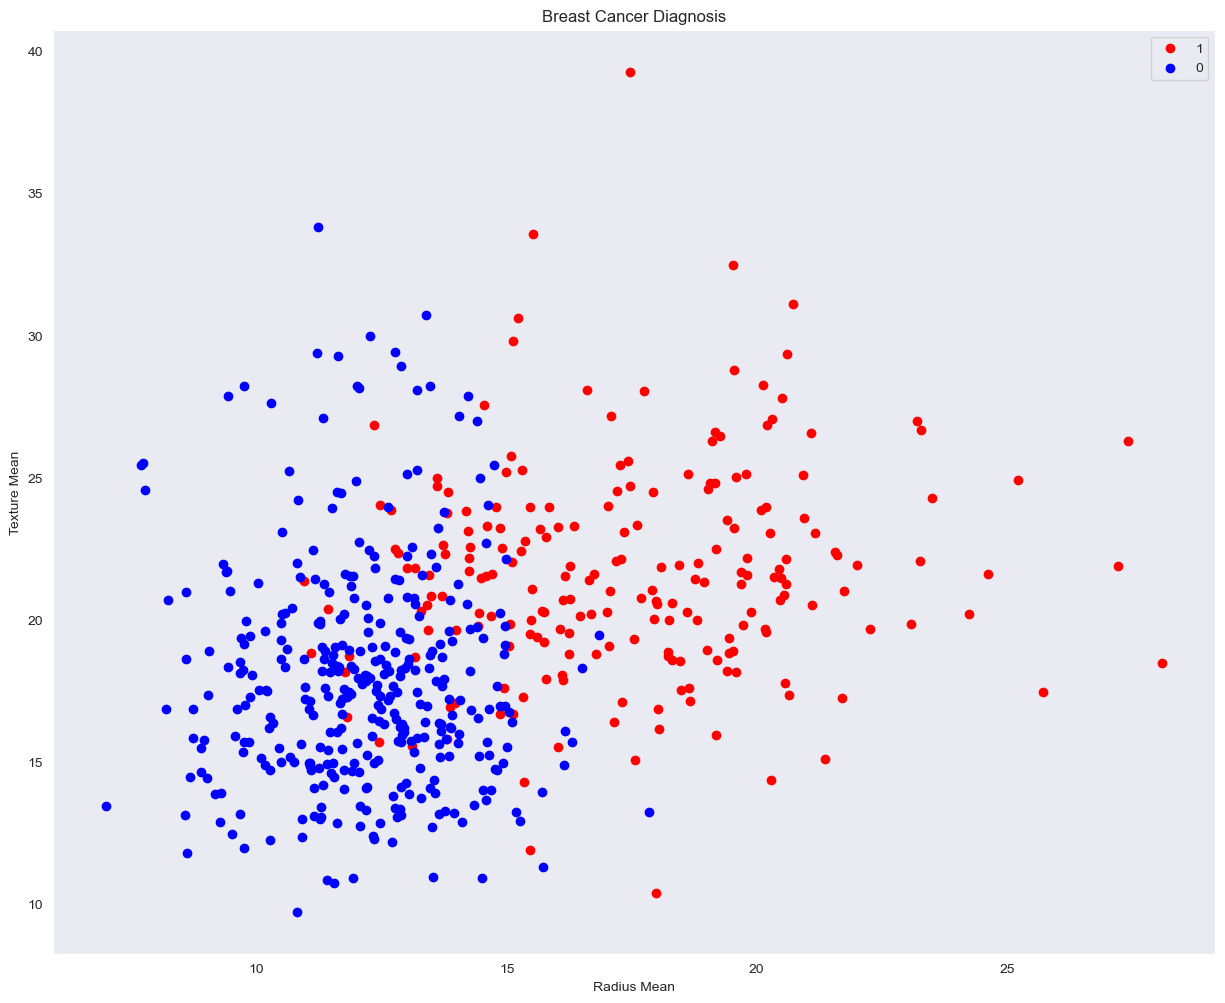

In [18]:
# Subset the dataframe by malignant and benign diagnosis for the X and Y-axis.
malignant_data = breast_cancer_data[breast_cancer_data.diagnosis == "1"]
benign_data = breast_cancer_data[breast_cancer_data.diagnosis == "0"]

# Visualize using a scatter plot
plt.scatter(malignant_data['radius_mean'], malignant_data['texture_mean'], color='red', label='1')
plt.scatter(benign_data['radius_mean'], benign_data['texture_mean'], color='blue', label='0')
plt.legend()
plt.title('Breast Cancer Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')

# Display the plot
plt.show()


<Axes: title={'center': 'Breast Cancer Features Correlation'}>

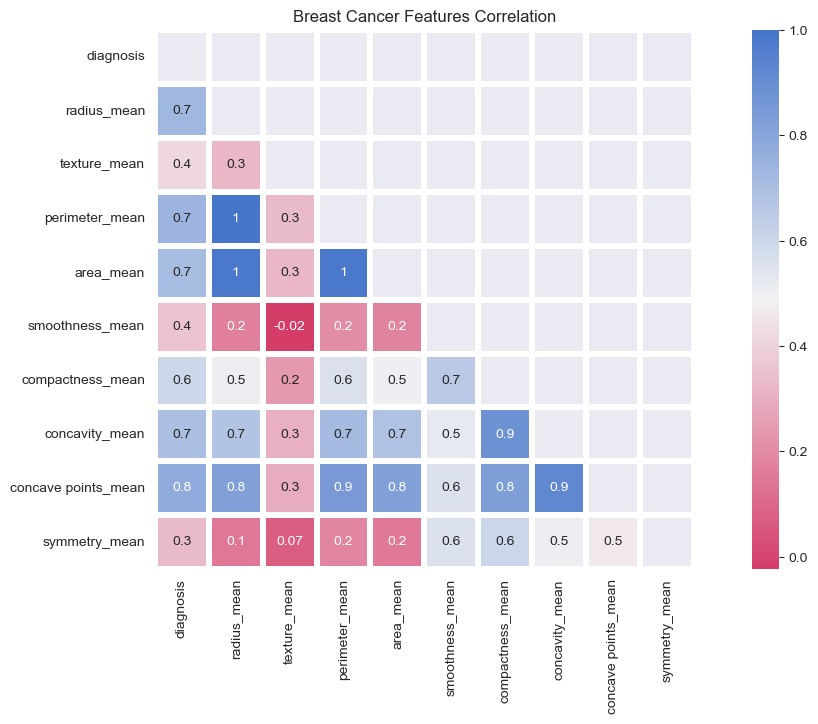

In [19]:
# To perform the Computation of the correlation matrix
correlation_matrix = data_mean.corr()

# To creates a binary mask to hide the upper triangle of the correlation matrix named
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# To initializes a plot figure using Matplotlib
data, ax = plt.subplots(figsize=(15, 7))
plt.title('Breast Cancer Features Correlation')

# To generates a custom diverging color map using Seaborn
cmap = sns.diverging_palette(0, 255, as_cmap=True)

# To plot a heatmap of the correlation matrix (corr) using Seaborn
sns.heatmap(correlation_matrix, vmax=1.0, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.1g',linewidths=4)

THE CORRELATION OBSERVATION:

The analysis reveals strong positive correlations between mean value parameters, specifically within the range of 1.0-0.8. Of note, a strong positive correlation exists between the mean area of the tissue nucleus and mean values of both radius and perimeter, indicating that these parameters are likely to covary. 

In addition, several parameters show moderate positive correlations (with r values between 0.5-0.7), such as concavity and area, concavity, and perimeter. Conversely, certain parameters, such as fractal_dimension, display strong negative correlations with mean value parameters, including radius, texture, and perimeter. 

Overall, these findings suggest that certain parameters are highly related, while others are only moderately or negatively correlated, and highlight the importance of considering multiple parameters when analyzing breast cancer data.

SUMMARY

The mean values of cell radius, perimeter, area, compactness, concavity, and concave points can be utilized to classify cancer. If the mean parameter values are larger in value, it indicates a strong correlation with malignant tumors. However, the mean values of texture, smoothness, symmetry, or fractal dimension do not provide a distinct preference for either diagnosis. Upon inspection of the histograms, there are no discernible substantial outliers that require further attention or cleanup.

Please find below the link to the Tableau dashboard, showcasing some of the results of the analysis:

https://public.tableau.com/app/profile/chioma.uche/viz/BreastCancerProject_16962803876010/Story1